In [1]:
#EXAMPLE BIN CODE
#ranges = [0,600,1200,1800,2400]
#labels = ["Early Morning", "Morning", "Afternoon", "Evening"]
#plane["ArrTime2"] = pd.cut(plane.ArrTime, ranges, labels=labels).astype("category")

#?pd.to_datetime
#train_df['timestamp'] = pd.to_datetime(train_df['timestamp'], format='%Y-%m-%d %H:%M:%S')
#train_df.timestamp.describe()

### TO USE LATER
'''
func_dict = {"score": "mean", 
             "user_country": lambda x: (x != "USA").mean(),
             "pool": "first",
             "gym": "first",
             "tennis_court": "first",
             "spa": "first",
             "casino": "first",
             "free_internet": "first",
             "hotel_stars": "first",
             "nr_rooms": "first",
            }
hotel_df = by_hotel.agg(func_dict)
'''

'\nfunc_dict = {"score": "mean", \n             "user_country": lambda x: (x != "USA").mean(),\n             "pool": "first",\n             "gym": "first",\n             "tennis_court": "first",\n             "spa": "first",\n             "casino": "first",\n             "free_internet": "first",\n             "hotel_stars": "first",\n             "nr_rooms": "first",\n            }\nhotel_df = by_hotel.agg(func_dict)\n'

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
from plotly.colors import n_colors
import plotly.figure_factory as ff
import datetime
from astral import Astral
import chart_studio
chart_studio.tools.set_credentials_file(username='sskowronski', api_key='D8RUhDTi9YKoYpESoM06')

In [230]:
train_df = pd.read_pickle('tz_aware_merged_data_yh_v2_cmp_clean.pkl')


In [231]:
train_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,hour_of_day,day_of_week,day_of_month,day_of_year,week_of_year,month_of_year,hour,day,week,primary_use_num
0,0,0,2016-01-01,220.046478,0,Education,7432,2008,8,19.40625,...,0,4,1,1,53,1,0,0,0,0
1,1,0,2016-01-01,101.917961,0,Education,2720,2004,5,19.40625,...,0,4,1,1,53,1,0,0,0,0
2,2,0,2016-01-01,5.634698,0,Education,5376,1991,4,19.40625,...,0,4,1,1,53,1,0,0,0,0
3,3,0,2016-01-01,366.496399,0,Education,23685,2002,10,19.40625,...,0,4,1,1,53,1,0,0,0,0
4,4,0,2016-01-01,1568.406494,0,Education,116607,1975,1,19.40625,...,0,4,1,1,53,1,0,0,0,0


In [232]:
train_df.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'timestamp_utc',
       'wind_direction', 'wind_speed', 'timezone', 'country_code', 'location',
       'dst', 'local_time', 'timedelta', 'hour_of_day', 'day_of_week',
       'day_of_month', 'day_of_year', 'week_of_year', 'month_of_year', 'hour',
       'day', 'week', 'primary_use_num'],
      dtype='object')

In [233]:
# HERES WHERE ALL OF THE MISSING TIMESTAMPS ARE: 44738 rows × 32 columns
train_df[train_df.local_time != train_df.index].head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,hour_of_day,day_of_week,day_of_month,day_of_year,week_of_year,month_of_year,hour,day,week,primary_use_num
0,0,0,2016-01-01,220.046478,0,Education,7432,2008,8,19.40625,...,0,4,1,1,53,1,0,0,0,0
1,1,0,2016-01-01,101.917961,0,Education,2720,2004,5,19.40625,...,0,4,1,1,53,1,0,0,0,0
2,2,0,2016-01-01,5.634698,0,Education,5376,1991,4,19.40625,...,0,4,1,1,53,1,0,0,0,0
3,3,0,2016-01-01,366.496399,0,Education,23685,2002,10,19.40625,...,0,4,1,1,53,1,0,0,0,0
4,4,0,2016-01-01,1568.406494,0,Education,116607,1975,1,19.40625,...,0,4,1,1,53,1,0,0,0,0


# -----------------------------------------------------------------------------------------
# What are useful bins for this dataset?

From https://www.mdpi.com/2504-4990/1/3/56

In [312]:
category = pd.Series(["Temporal","Temporal","Temporal","Temporal","Weather","Weather","Meta","Meta","Meta","Meta","Meta","Meta","Meta","Meta","Meta"], name="Category")
variable = pd.Series(["Time of day", "Day of week", "Public holiday schedule", "Schedule type", "Outdoor air temperature", "Outdoor air humidity", "Industry sector", "Primary use type", "Floor area", "Number of floors", "Climate zone", "Maximum occupancy", "Cooling system type", "Heating system type", "Performance rating"], name="Variable")
behavior_targeted = pd.Series(["Daily schedules", "Weekly schedules", "Holidays", "Seasonal schedules", "Sensible heating and cooling", "Latent heating and cooling", "General category of use","Specific category of use","Size of building", "Height of building", "Type of building", "Total number of people","Typical cooling efficiency", "Typical heating efficiency", "Comparison to its peers"], name="Behavior Targeted")
input_features = pd.DataFrame(data=[category, variable, behavior_targeted],dtype=str)
input_features = input_features.T

In [313]:
colorscale = [[0, '#4d004c'],[.5, '#f2e5ff'],[1, '#ffffff']]
table = ff.create_table(input_features, colorscale = colorscale, height_constant = 20)
table.show()

In [9]:
category = pd.Series(["Temporal","Temporal","Temporal","Temporal","Weather","Weather","Meta","Meta","Meta","Meta","Meta","Meta","Meta","Meta","Meta"], name="Category")
variable = pd.Series(["Time of day", "Day of week", "Public holiday schedule", "Schedule type", "Outdoor air temperature", "Outdoor air humidity", "Industry sector", "Primary use type", "Floor area", "Number of floors", "Climate zone", "Maximum occupancy", "Cooling system type", "Heating system type", "Performance rating"], name="Variable")
behavior_targeted = pd.Series(["Daily schedules", "Weekly schedules", "Holidays", "Seasonal schedules", "Sensible heating and cooling", "Latent heating and cooling", "General category of use","Specific category of use","Size of building", "Height of building", "Type of building", "Total number of people","Typical cooling efficiency", "Typical heating efficiency", "Comparison to its peers"], name="Behavior Targeted")
input_features = pd.DataFrame(data=[category, variable, behavior_targeted],dtype=str)
input_features = input_features.T

variables_table = go.Figure(data=[go.Table(
    header=dict(values=["<b>{}</b>".format(x) for x in ["Category", "Variable","Behavior Targeted"]],
                #fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[input_features["Category"], input_features["Variable"], input_features["Behavior Targeted"]],
               #fill_color='lavender',
               align='left'))
])
variables_table.show()

## Looking at variables available from ASHRAE

### Can group first by primary_use and site_id

### and then by:

- Seasons: ["winter", "spring", "summer", "autumn"] --> [1,2,3,4]
    - Broad cut to see if electricity usage is higher in spring months
- Day of week: [0,1,2,3,4,5,6]
    - This will vary by `primary_use`
    - https://www.sciencedirect.com/science/article/abs/pii/S0926580514002015?via%3Dihub
- Sunrise/sunsets shifts
    - Using
        - Leaked site locations: https://www.kaggle.com/c/ashrae-energy-prediction/discussion/112841#latest-649772
        - Astral python package: https://astral.readthedocs.io/en/stable/index.html    
- Will we be able to isolate this? Working versus non working hours - this will vary by `primary_use` https://www.sciencedirect.com/science/article/abs/pii/S0926580514002015?via%3Dihub

### and then by:
- Total `meter_reading`
- Averages of weather variables
- Climate zones from "Reference Standard Reporduction Annex," ASHRAE Standard 169, Climatic Data for Building Design Standards? Nope, behind a paywall -- https://www.techstreet.com/ashrae/standards/ashrae-169-2013?ashrae_auth_token=12ce7b1d-2e2e-472b-b689-8065208f2e36&gateway_code=ashrae&product_id=1869436

### Categorical attributes

- site_id
- primary_use
- square_feet
- year_built ***
- floor_count ***

### Continuous attributes

- timestamp ***
- meter_reading ***
- air_temperature ***
- cloud_coverage
- dew_temperature ***
- precip_depth_1_hr
- sea_level_pressure
- wind_direction
- wind_speed

*** are the imputed variables

#### Notes from Lord Egg Video (https://www.youtube.com/watch?time_continue=5&v=NZyQu1u3N9Y&feature=emb_logo)
- Energy efifciency standards are popping up more and more, due to cost and environmental issues. 
- Residential and commercial buildings tend to have different energy efficiency standards
- EE target for 2016: ~20%
- They're on 3-year cycles
- Guide: 30%, 50%, net zero energy design guides (https://www.ashrae.org/technical-resources/aedgs)
- Divide regions by 8 climate zones, subdivide into (https://www.techstreet.com/ashrae/standards/ashrae-169-2013?ashrae_auth_token=12ce7b1d-2e2e-472b-b689-8065208f2e36&gateway_code=ashrae&product_id=1869436
) behind a $94 paywall:
    - A humid climate zone
    - B dry climate zone
    - C marine climate zone

### Groupby methods: https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html

### Checking for categorical features

In [119]:
def is_unique(series):
    return len(series.unique()) == 1

### `year_built` and `square_feet` are no longer consistent by `building_id`

In [296]:
group_by_building_id = train_df.groupby("building_id")

In [307]:
#multiple_year_buildings = group_by_building_id["year_built"].nunique()[group_by_building_id["year_built"].nunique() > 1]

In [308]:
multiple_year_buildings

building_id
105     28
106     13
112     29
116     24
127     10
138     15
140     18
142     17
143     16
144     23
145     16
157     18
158     13
159     22
160     20
161     21
173     52
174     43
178     16
180     23
182     15
184     35
185     61
194     26
196     28
197     23
207     21
211     55
218     29
223     16
        ..
1305    16
1306    14
1307    21
1308    20
1309    19
1310    19
1311    18
1312    14
1313    20
1314    12
1315    24
1316    20
1317    16
1318    29
1319    30
1320    26
1321    22
1322    22
1323    15
1324    32
1351    12
1352    14
1353     5
1355    14
1356    13
1357     6
1370    17
1395    12
1421    16
1445     9
Name: year_built, Length: 750, dtype: int64

In [303]:
group_by_building_id.get_group(1445).year_built.value_counts()

1961    3887
1912    1171
1914    1054
1976     430
1967     344
1958     201
1997     188
1960     122
1993      53
Name: year_built, dtype: int64

In [12]:
#group_by_building_id.agg(is_unique).all() # Review categorical attributes for buildings

# Using datetime to make bins

### Meteorological season bins

https://www.calendar-365.com/seasons.html


Northern Hemisphere
- Spring: 1 March to 31 May
- Summer: 1 June to 31 August
- Autumn: 1 September to 30 November
- Winter: 1 December to 28 February

Southern Hemisphere
- Spring: 1 September to 30 November
- Summer: 1 December to 28 February
- Autumn: 1 March to 31 May
- Winter: 1 June to 31 August

In [16]:
#bin1 = datetime.datetime.strptime("2016-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
#bin2 = datetime.datetime.strptime("2016-03-01 00:00:00", "%Y-%m-%d %H:%M:%S")
#bin3 = datetime.datetime.strptime("2016-06-01 00:00:00", "%Y-%m-%d %H:%M:%S")
#bin4 = datetime.datetime.strptime("2016-09-01 00:00:00", "%Y-%m-%d %H:%M:%S")
#bin5 = datetime.datetime.strptime("2016-12-01 00:00:00", "%Y-%m-%d %H:%M:%S")
#bin6 = datetime.datetime.strptime("2016-12-31 23:00:00", "%Y-%m-%d %H:%M:%S")
#ranges = [bin1,bin2,bin3,bin4,bin5,bin6]
#labels = ["winter_end","spring","summer","autumn","winter_start"]
#train_df["m_season"] = pd.cut(train_df.timestamp, ranges, labels=labels, include_lowest=True).astype("category")

In [17]:
#### WORK IN PROGRESS -- TRYING TO MERGE TWO WINTER SEGMENTS, NOT USING CUT FEATURE
#winter_end = pd.date_range(start='2016-01-01', end='2016-02-28 23:00:00', freq='H')
#winter_start = pd.date_range(start='2016-12-01', end='2016-12-31 23:00:00', freq='H')
#spring = pd.date_range(start='2016-03-01', end='2016-05-31 23:00:00', freq='H')
#summer = pd.date_range(start='2016-06-01', end='2016-08-31 23:00:00', freq='H')
#autumn = pd.date_range(start='2016-09-01', end='2016-11-30 23:00:00', freq='H')

#### Another way?

In [234]:
train_df["season"] = 0

In [235]:
train_df.season[(train_df.timestamp >= "2016-01") & (train_df.timestamp < "2016-03")] = "winter"
train_df.season[(train_df.timestamp >= "2016-03") & (train_df.timestamp < "2016-06")] = "spring"
train_df.season[(train_df.timestamp >= "2016-06") & (train_df.timestamp < "2016-09")] = "summer"
train_df.season[(train_df.timestamp >= "2016-09") & (train_df.timestamp < "2016-12")] = "autumn"
train_df.season[(train_df.timestamp >= "2016-12")] = "winter"

In [237]:
groupby_site_season = train_df.groupby(["site_id", "season"])

In [238]:
groupby_site_season.meter_reading.sum().unstack()

season,autumn,spring,summer,winter
site_id,,,,
0,85473768.00,81956296.0,83449328.0,81317408.0
1,17858956.00,18465256.0,18295154.0,18125546.0
2,45629868.00,44695464.0,47524724.0,43825396.0
3,70409976.00,66715612.0,88705016.0,72862664.0
4,35399620.00,33877164.0,33163144.0,32795968.0
5,6218452.50,6237167.5,5397025.5,6788983.5
6,13783132.00,14226558.0,13373228.0,14227234.0
7,62900632.00,64271096.0,55305716.0,67918448.0
8,9585714.00,9588676.0,9282878.0,8985633.0


In [239]:
train_df.season.unique()

array(['winter', 'spring', 'summer', 'autumn'], dtype=object)

### Day of the week bins

 Series.dt.dayofweek

    The day of the week with Monday=0, Sunday=6.

    Return the day of the week. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6. This method is available on both Series with datetime values (using the dt accessor) or DatetimeIndex.

# Grouby `site_id`, then by `quarter`

### Q1-Q2-Q3-Q4 bins

- 1: 1 January to 31 March
- 2: 1 April to 31 May
- 3: 1 June to 30 September
- 4: 1 October to 31 December

In [241]:
#bin1 = datetime.datetime.strptime("2016-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
#bin2 = datetime.datetime.strptime("2016-04-01 00:00:00", "%Y-%m-%d %H:%M:%S")
#bin3 = datetime.datetime.strptime("2016-07-01 00:00:00", "%Y-%m-%d %H:%M:%S")
#bin4 = datetime.datetime.strptime("2016-10-01 00:00:00", "%Y-%m-%d %H:%M:%S")
#bin5 = datetime.datetime.strptime("2016-12-31 23:00:00", "%Y-%m-%d %H:%M:%S")
#ranges = [bin1,bin2,bin3,bin4,bin5]
#labels = [1,2,3,4]
#train_df["quarter"] = pd.cut(train_df.timestamp, ranges, labels=labels, include_lowest=True).astype("category")
#group_by_site_quarter = train_df.groupby(["site_id", "quarter"])
#group_by_site_quarter.get_group((0,1)).meter_reading.sum()
# SUM OF METER READING BY SITE_ID DURING EACH QUARTER OF THE YEAR
#group_by_site_quarter.meter_reading.sum().unstack()

# Site-specific holidays

From https://www.kaggle.com/c/ashrae-energy-prediction/discussion/115256#latest-674087

In [243]:
import holidays

en_holidays = holidays.England()
ir_holidays = holidays.Ireland()
ca_holidays = holidays.Canada()
us_holidays = holidays.UnitedStates()

en_idx = train_df.query('site_id == 1 or site_id == 5').index
ir_idx = train_df.query('site_id == 12').index
ca_idx = train_df.query('site_id == 7 or site_id == 11').index
us_idx = train_df.query('site_id == 0 or site_id == 2 or site_id == 3 or site_id == 4 or site_id == 6 or site_id == 8 or site_id == 9 or site_id == 10 or site_id == 13 or site_id == 14 or site_id == 15').index

train_df['IsHoliday'] = 0
train_df.loc[en_idx, 'IsHoliday'] = train_df.loc[en_idx, 'timestamp'].apply(lambda x: en_holidays.get(x, default=0))
train_df.loc[ir_idx, 'IsHoliday'] = train_df.loc[ir_idx, 'timestamp'].apply(lambda x: ir_holidays.get(x, default=0))
train_df.loc[ca_idx, 'IsHoliday'] = train_df.loc[ca_idx, 'timestamp'].apply(lambda x: ca_holidays.get(x, default=0))
train_df.loc[us_idx, 'IsHoliday'] = train_df.loc[us_idx, 'timestamp'].apply(lambda x: us_holidays.get(x, default=0))

holiday_idx = train_df['IsHoliday'] != 0
train_df.loc[holiday_idx, 'IsHoliday'] = 1
train_df['IsHoliday'] = train_df['IsHoliday'].astype(np.uint8)

In [244]:
train_df.groupby("IsHoliday")["meter_reading"].sum()

IsHoliday
0    2.184169e+09
1    6.155739e+07
Name: meter_reading, dtype: float32

# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------

# CHART MAKING!

In [245]:
train_df.set_index("timestamp", inplace=True)

# Groupby `site_id` then resample into `day_of_year` to plot

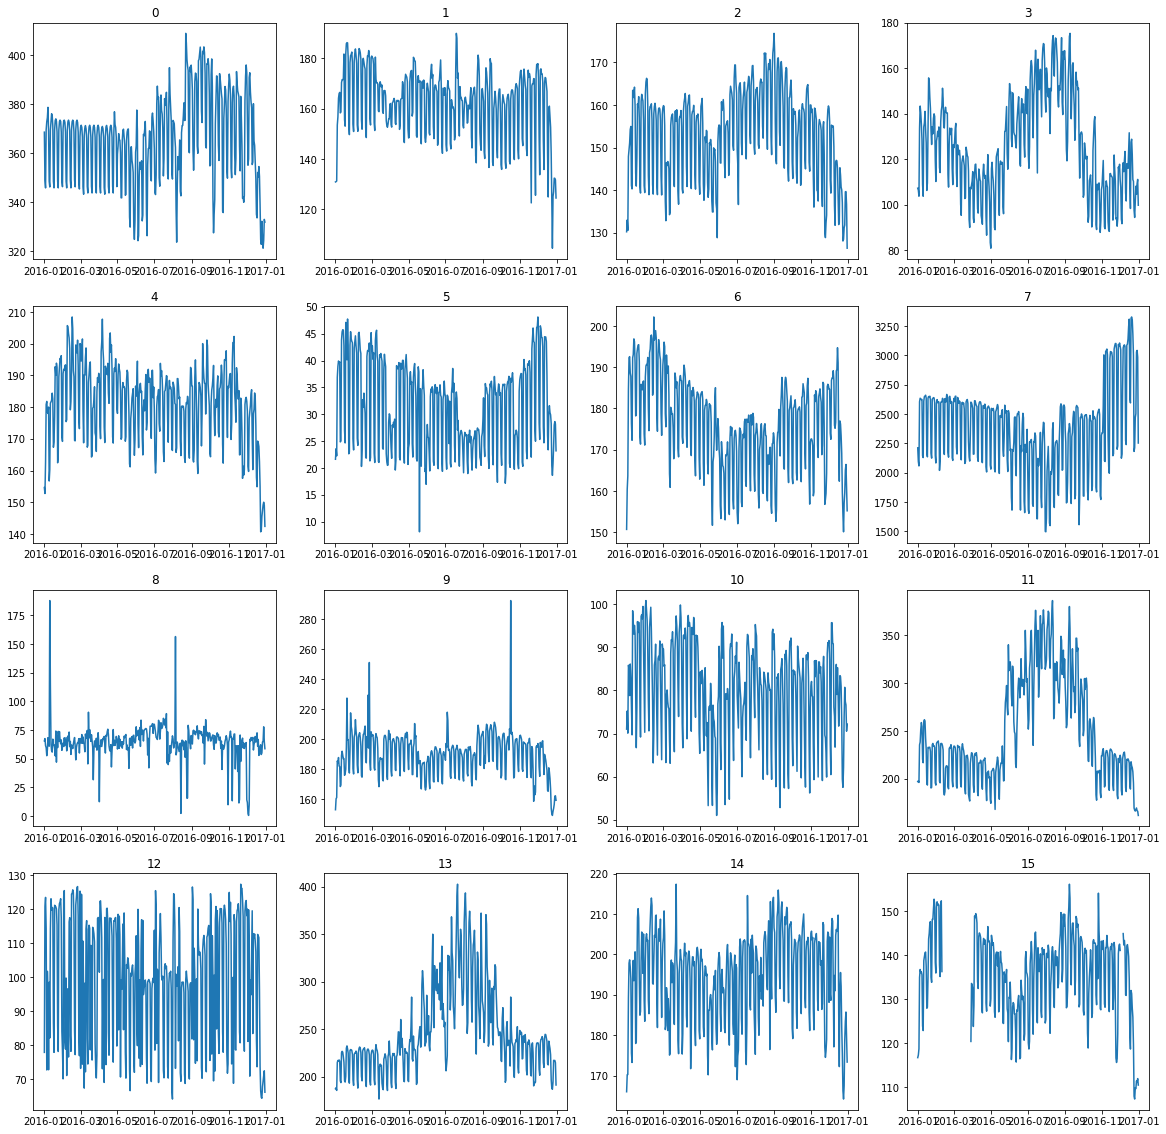

In [247]:
group_site_id = train_df.groupby("site_id")
fig, ax = plt.subplots(4,4,figsize=(20,20)) # Creates 4x4 figure of plots
#ax.set_yscale('log')
for i in range(4):
    ax[0][i].plot(group_site_id.get_group(i)["meter_reading"].resample("D").mean())
    ax[0][i].set_title(i)
for i in range(4,8):
    ax[1][i-4].plot(group_site_id.get_group(i)["meter_reading"].resample("D").mean())
    ax[1][i-4].set_title(i)
for i in range(8,12):
    ax[2][i-8].plot(group_site_id.get_group(i)["meter_reading"].resample("D").mean())
    ax[2][i-8].set_title(i)
for i in range(12,16):
    ax[3][i-12].plot(group_site_id.get_group(i)["meter_reading"].resample("D").mean())
    ax[3][i-12].set_title(i)

# Groupby `site_id` then `hour_of_day`

In [248]:
# SORTING BY SITE_ID AND HOUR_OF_DAY
group_site_hour = train_df.groupby(["site_id", "hour_of_day"])
# FINDING THE MEAN FOR EACH HOUR OF THE DAY PER SITE
site_hour_plot = group_site_hour["meter_reading"].agg("mean").unstack().T

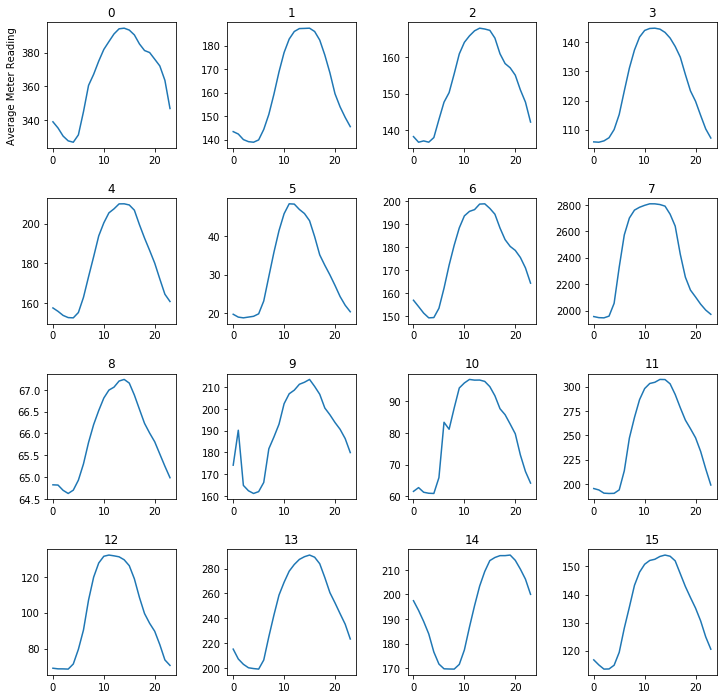

In [249]:
fig, ax = plt.subplots(4,4,figsize=(12,12)) # Creates 4x4 figure of plots
#ax.set_yscale('log')
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.4)

for i in range(4):
    ax[0][i].plot(site_hour_plot[i])
    ax[0][i].set_title(i)
    ax[0][0].set_ylabel("Average Meter Reading")
for i in range(4,8):
    ax[1][i-4].plot(site_hour_plot[i])
    ax[1][i-4].set_title(i)
for i in range(8,12):
    ax[2][i-8].plot(site_hour_plot[i])
    ax[2][i-8].set_title(i)
for i in range(12,16):
    ax[3][i-12].plot(site_hour_plot[i])
    ax[3][i-12].set_title(i)

# Groupby `primary_use` then `hour_of_day`

In [250]:
use_list = train_df.primary_use.unique().tolist()
use_list.sort()

In [251]:
# SORTING BY PRIMARY_USE AND HOUR_OF_DAY
group_use_hour = train_df.groupby(["primary_use", "hour_of_day"])
# FINDING THE MEAN FOR EACH HOUR OF THE DAY PER SITE
use_hour_plot = group_use_hour["meter_reading"].agg("mean").unstack().T

In [252]:
use_hour_plot.head()

primary_use,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
hour_of_day,,,,,,,,,,,,,,,,
0,232.867004,108.284744,97.298309,299.074829,129.413498,59.836647,142.657425,84.619263,78.204926,90.861092,2.773308,178.098480,94.964523,97.039383,261.456696,47.999779
1,233.806274,107.142853,86.046707,295.394867,126.932144,54.688221,141.448563,84.110489,77.717354,89.038086,2.605558,175.440887,94.144753,97.128403,265.728241,47.262043
2,229.410812,102.228172,74.985237,291.970215,120.214485,53.689026,139.504532,83.658279,76.781250,87.330711,2.443019,172.950272,93.131256,97.108597,269.361206,46.709034
3,228.957382,101.418297,70.746529,289.006439,116.877472,55.604160,138.539703,83.590340,76.406075,86.474419,2.384539,171.555542,92.761147,96.842072,264.713684,46.418732
4,231.948074,101.521904,70.846321,286.176178,114.898972,56.304131,139.096863,83.954170,76.490051,85.443748,2.513721,174.225113,93.045036,97.253433,255.059387,46.349033


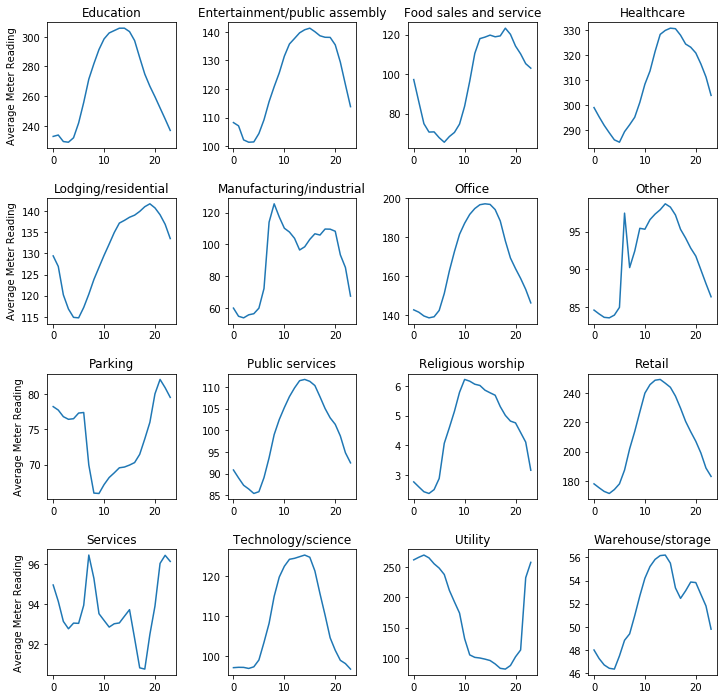

In [253]:
fig, ax = plt.subplots(4,4,figsize=(12,12)) # Creates 4x4 figure of plots
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.4)
#ax.set_yscale('log')
for i in range(4):
    ax[0][i].plot(use_hour_plot[use_list[i]])
    ax[0][i].set_title(use_list[i])
    ax[0][0].set_ylabel("Average Meter Reading")
for i in range(4,8):
    ax[1][i-4].plot(use_hour_plot[use_list[i]])
    ax[1][i-4].set_title(use_list[i])
    ax[1][0].set_ylabel("Average Meter Reading")
for i in range(8,12):
    ax[2][i-8].plot(use_hour_plot[use_list[i]])
    ax[2][i-8].set_title(use_list[i])
    ax[2][0].set_ylabel("Average Meter Reading")
for i in range(12,16):
    ax[3][i-12].plot(use_hour_plot[use_list[i]])
    ax[3][i-12].set_title(use_list[i])
    ax[3][0].set_ylabel("Average Meter Reading")

# Which `primary_use` will have expected weekend energy behavior?

In [254]:
train_df_weekend = train_df[train_df.day_of_week >= 5]
train_df_weekday = train_df[train_df.day_of_week < 5]

# SORTING BY PRIMARY_USE AND HOUR_OF_DAY
group_use_hour_weekend = train_df_weekend.groupby(["primary_use", "hour_of_day"])
group_use_hour_weekday = train_df_weekday.groupby(["primary_use", "hour_of_day"])

# FINDING THE MEAN FOR EACH HOUR OF THE DAY PER SITE
use_hour_weekend_plot = group_use_hour_weekend["meter_reading"].agg("mean").unstack().T
use_hour_weekday_plot = group_use_hour_weekday["meter_reading"].agg("mean").unstack().T

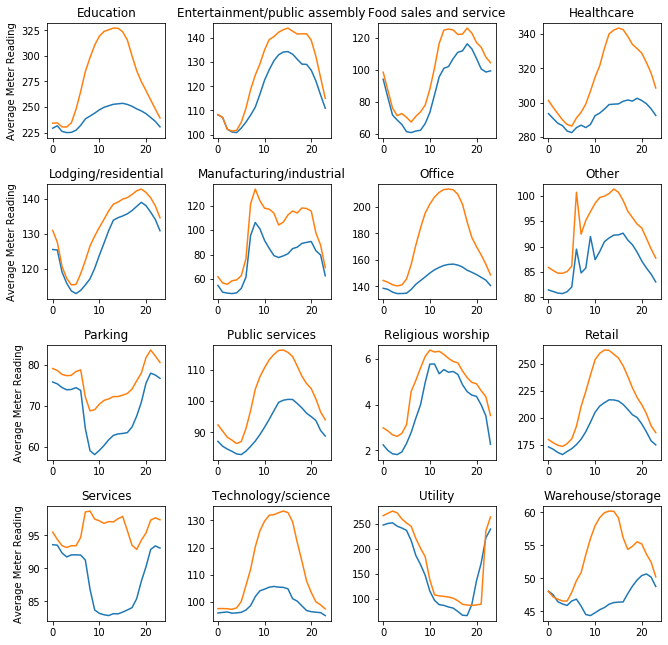

In [255]:
fig, ax = plt.subplots(4,4,figsize=(11,11)) # Creates 4x4 figure of plots
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.4)
hours = np.arange(24)
#ax.set_yscale('log')
for i in range(4):
    ax[0][i].plot(hours, use_hour_weekend_plot[use_list[i]], label="Weekend")
    ax[0][i].plot(hours, use_hour_weekday_plot[use_list[i]], label="Weekday")
    ax[0][i].set_title(use_list[i])
    #ax[0][i].legend()
    ax[0][0].set_ylabel("Average Meter Reading")
for i in range(4,8):
    ax[1][i-4].plot(hours, use_hour_weekend_plot[use_list[i]])
    ax[1][i-4].plot(hours, use_hour_weekday_plot[use_list[i]])
    ax[1][i-4].set_title(use_list[i])
    ax[1][0].set_ylabel("Average Meter Reading")
for i in range(8,12):
    ax[2][i-8].plot(hours, use_hour_weekend_plot[use_list[i]])
    ax[2][i-8].plot(hours, use_hour_weekday_plot[use_list[i]])
    ax[2][i-8].set_title(use_list[i])
    ax[2][0].set_ylabel("Average Meter Reading")
for i in range(12,16):
    ax[3][i-12].plot(hours, use_hour_weekend_plot[use_list[i]])
    ax[3][i-12].plot(hours, use_hour_weekday_plot[use_list[i]])
    ax[3][i-12].set_title(use_list[i])
    ax[3][0].set_ylabel("Average Meter Reading")
#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')

# Which `primary_use` is most affected by meteorlogical seasons?

In [256]:
train_df_winter = train_df[train_df.season == "winter"]
train_df_spring = train_df[train_df.season == "spring"]
train_df_summer = train_df[train_df.season == "summer"]
train_df_autumn = train_df[train_df.season == "autumn"]

# SORTING BY PRIMARY_USE AND HOUR_OF_DAY
group_use_hour_winter = train_df_winter.groupby(["primary_use", "hour_of_day"])
group_use_hour_spring = train_df_spring.groupby(["primary_use", "hour_of_day"])
group_use_hour_summer = train_df_summer.groupby(["primary_use", "hour_of_day"])
group_use_hour_autumn = train_df_autumn.groupby(["primary_use", "hour_of_day"])

# FINDING THE MEAN FOR EACH HOUR OF THE DAY PER SITE
use_hour_winter_plot = group_use_hour_winter["meter_reading"].agg("mean").unstack().T
use_hour_spring_plot = group_use_hour_spring["meter_reading"].agg("mean").unstack().T
use_hour_summer_plot = group_use_hour_summer["meter_reading"].agg("mean").unstack().T
use_hour_autumn_plot = group_use_hour_autumn["meter_reading"].agg("mean").unstack().T

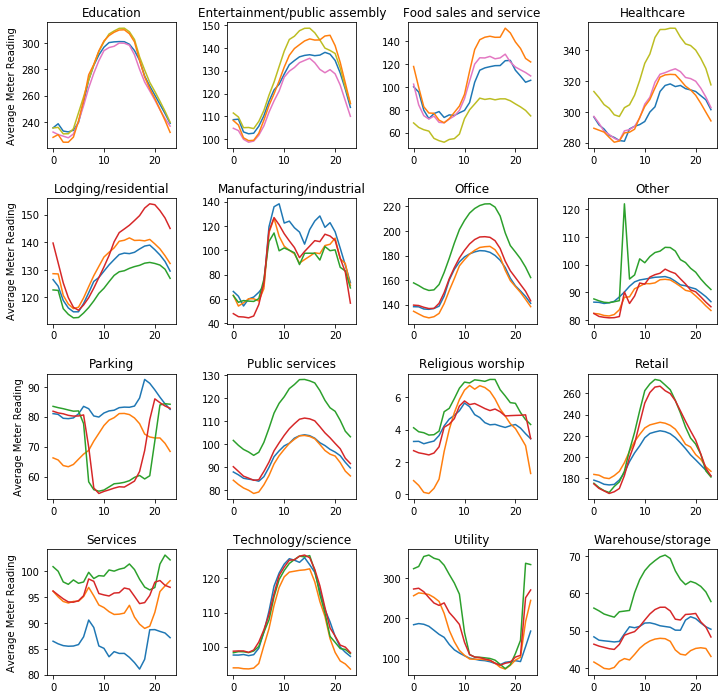

In [257]:
fig, ax = plt.subplots(4,4,figsize=(12,12)) # Creates 4x4 figure of plots
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.4)
hours = np.arange(24)
#ax.set_yscale('log')
for i in range(4):
    ax[0][i].plot(hours, use_hour_winter_plot[use_list[i]], label="Winter", color="C0") #blue
    ax[0][i].plot(hours, use_hour_spring_plot[use_list[i]], label="Spring", color="C6") #pink
    ax[0][i].plot(hours, use_hour_summer_plot[use_list[i]], label="Summer", color="C8") #lightgreen
    ax[0][i].plot(hours, use_hour_autumn_plot[use_list[i]], label="Autumn", color="C1") #green
    ax[0][i].set_title(use_list[i])
    ax[0][0].set_ylabel("Average Meter Reading")
for i in range(4,8):
    ax[1][i-4].plot(hours, use_hour_winter_plot[use_list[i]], label="Winter")
    ax[1][i-4].plot(hours, use_hour_spring_plot[use_list[i]], label="Spring")
    ax[1][i-4].plot(hours, use_hour_summer_plot[use_list[i]], label="Summer")
    ax[1][i-4].plot(hours, use_hour_autumn_plot[use_list[i]], label="Autumn")
    ax[1][i-4].set_title(use_list[i])
    ax[1][0].set_ylabel("Average Meter Reading")
for i in range(8,12):
    ax[2][i-8].plot(hours, use_hour_winter_plot[use_list[i]], label="Winter")
    ax[2][i-8].plot(hours, use_hour_spring_plot[use_list[i]], label="Spring")
    ax[2][i-8].plot(hours, use_hour_summer_plot[use_list[i]], label="Summer")
    ax[2][i-8].plot(hours, use_hour_autumn_plot[use_list[i]], label="Autumn")
    ax[2][i-8].set_title(use_list[i])
    ax[2][0].set_ylabel("Average Meter Reading")
for i in range(12,16):
    ax[3][i-12].plot(hours, use_hour_winter_plot[use_list[i]], label="Winter")
    ax[3][i-12].plot(hours, use_hour_spring_plot[use_list[i]], label="Spring")
    ax[3][i-12].plot(hours, use_hour_summer_plot[use_list[i]], label="Summer")
    ax[3][i-12].plot(hours, use_hour_autumn_plot[use_list[i]], label="Autumn")
    ax[3][i-12].set_title(use_list[i])
    ax[3][0].set_ylabel("Average Meter Reading")



# Groupby `location` then `hour_of_day`

In [258]:
loc_list = train_df.location.unique().tolist()
loc_list=loc_list[1:5]+loc_list[6:]
loc_list

['UK, Southampton',
 'Tempe, AZ',
 'Washington, WA',
 'San Francisco, CA',
 'Philadelphia?, PA',
 'Montreal/Ottawa',
 'Austin, Texas',
 'Las Vegas?, NV',
 'Twin Cities, MN',
 'Charlottesville, VA',
 'UK, London (or Loughborugh?)',
 'Ireland',
 'Pittsburgh?, PA']

In [259]:
group_location_hour = train_df.groupby(["location", "hour_of_day"])
# FINDING THE MEAN FOR EACH HOUR OF THE DAY PER LOCATION
location_hour_plot = group_location_hour["meter_reading"].agg("mean").unstack().T

In [260]:
location_hour_plot.shape

(24, 14)

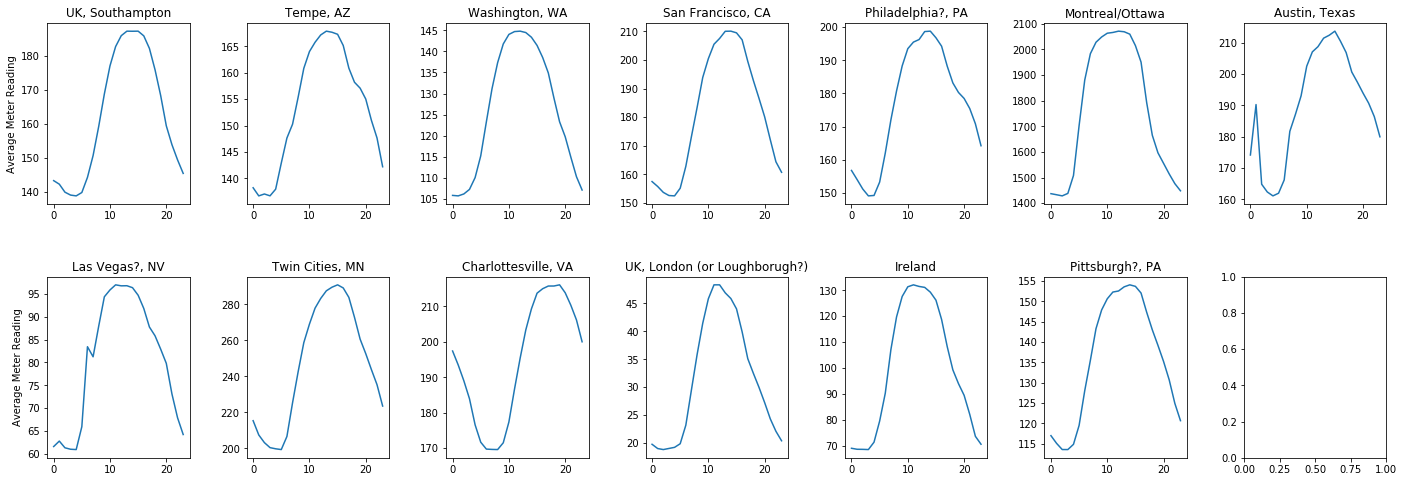

In [261]:
fig, ax = plt.subplots(2,7,figsize=(24,8)) # Creates 4x4 figure of plots
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.4)
#ax.set_yscale('log')
for i in range(7):
    ax[0][i].plot(location_hour_plot[loc_list[i]])
    ax[0][i].set_title(loc_list[i])
    ax[0][0].set_ylabel("Average Meter Reading")
for i in range(7,13):
    ax[1][i-7].plot(location_hour_plot[loc_list[i]])
    ax[1][i-7].set_title(loc_list[i])
    ax[1][0].set_ylabel("Average Meter Reading")

# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------

# Chartmaking with Plotly!

In [262]:
use_list

['Education',
 'Entertainment/public assembly',
 'Food sales and service',
 'Healthcare',
 'Lodging/residential',
 'Manufacturing/industrial',
 'Office',
 'Other',
 'Parking',
 'Public services',
 'Religious worship',
 'Retail',
 'Services',
 'Technology/science',
 'Utility',
 'Warehouse/storage']

## SEASONALITY

In [263]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, 
                    cols=4, 
                    subplot_titles=tuple(use_list), 
                    shared_xaxes=True, 
                    vertical_spacing=0.04, 
                    horizontal_spacing=0.08)

for i in fig['layout']['annotations']:
    i['font'] = dict(size=12)#,color='#ff0000')
    
fig['layout']['annotations']+=(go.layout.Annotation(x=0.5,
                                          y=-0.08,
                                          showarrow=False,
                                          text="Hour of Day",
                                          xref="paper",
                                          yref="paper",
                                          font=dict(size=16)),
                               go.layout.Annotation(x=-0.09,
                                          y=0.3,
                                          showarrow=False,
                                          text="Average Meter Reading (kWh)",
                                          textangle=-90,
                                          xref="paper",
                                          yref="paper",
                                          font=dict(size=16)
                                         ))

for i in range(1,5):
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_winter_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Winter',
                   marker=dict(color='#36abb5'),
                   showlegend = False),
        row=1, col=i
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_spring_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Spring',
                   marker=dict(color='#fe5e51'),
                   showlegend = False),
        row=1, col=i
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_summer_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Summer',
                   marker=dict(color='#ffb554'),
                   showlegend = False),
        row=1, col=i
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_autumn_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Autumn',
                   marker=dict(color='#9e3d64'),
                   showlegend = False),
        row=1, col=i
    )

for i in range(5,9):
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_winter_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Winter',
                   marker=dict(color='#36abb5'),
                   showlegend = False),
        row=2, col=i-4
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_spring_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Spring',
                   marker=dict(color='#fe5e51'),
                   showlegend = False),
        row=2, col=i-4
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_summer_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Summer',
                   marker=dict(color='#ffb554'),
                   showlegend = False),
        row=2, col=i-4
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_autumn_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Autumn',
                   marker=dict(color='#9e3d64'),
                   showlegend = False),
        row=2, col=i-4
    )

for i in range(9,13):
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_winter_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Winter',
                   marker=dict(color='#36abb5'),
                   showlegend = False),
        row=3, col=i-8
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_spring_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Spring',
                   marker=dict(color='#fe5e51'),
                   showlegend = False),
        row=3, col=i-8
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_summer_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Summer',
                   marker=dict(color='#ffb554'),
                   showlegend = False),
        row=3, col=i-8
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_autumn_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Autumn',
                   marker=dict(color='#9e3d64'),
                   showlegend = False),
        row=3, col=i-8
    )
for i in range(13,16):
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_winter_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Winter',
                   marker=dict(color='#36abb5'),
                   legendgroup="group",
                   showlegend = False),
        row=4, col=i-12
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_spring_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Spring',
                   marker=dict(color='#fe5e51'),
                   legendgroup="group",
                   showlegend = False),
        row=4, col=i-12
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_summer_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Summer',
                   marker=dict(color='#ffb554'),
                   legendgroup="group",
                   showlegend = False),
        row=4, col=i-12
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_autumn_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Autumn',
                   marker=dict(color='#9e3d64'),
                   legendgroup="group",
                   showlegend = False),
        row=4, col=i-12
    )

    
### I HAVE TO DO THE LAST SUBPLOT MANUALLY SO THAT I CAN GET A LEGEND

fig.add_trace(
    go.Scatter(x=hours, 
               y=use_hour_winter_plot[use_list[15]].tolist(), 
               mode='lines', 
               name='Winter',
               marker=dict(color='#36abb5')),
        row=4, col=4
)
fig.add_trace(
    go.Scatter(x=hours, 
                y=use_hour_spring_plot[use_list[15]].tolist(), 
                mode='lines', 
                name='Spring',
                marker=dict(color='#fe5e51')),
        row=4, col=4
)
fig.add_trace(
    go.Scatter(x=hours, 
                y=use_hour_summer_plot[use_list[15]].tolist(), 
                mode='lines', 
                name='Summer',
                marker=dict(color='#ffb554')),
    row=4, col=4
)
fig.add_trace(
    go.Scatter(x=hours, 
                y=use_hour_autumn_plot[use_list[15]].tolist(), 
                mode='lines', 
                name='Autumn',
                marker=dict(color='#9e3d64')),
        row=4, col=4
    )
    

fig.update_layout(height=800,width=900)
fig.update_xaxes(showgrid=False, range=[0, 24])
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()
#fig.update_layout(legend_orientation="h")
#fig.update_xaxes(title_text="xaxis 4 title", type="log", row=2, col=2)
#fig.update_traces(mode="markers", marker=dict(line_color='white', opacity=0.7))


from chart_studio.plotly import plot, iplot
plot(fig, filename = 'primary_use_by_season')



'https://plot.ly/~sskowronski/21/'

# `air_temperature`

In [266]:
usage_by_temp = pd.DataFrame(train_df.groupby('air_temperature')['meter_reading'].mean())

In [267]:
usage_by_temp.head(5)

,meter_reading
air_temperature,
-28.906250,213.219940
-28.796875,1599.497803
-28.703125,1635.050781
-28.593750,1577.943604
-28.406250,1593.419678


In [268]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter(x = usage_by_temp.index,
    y = usage_by_temp.meter_reading,
    mode='markers',
    marker=dict(
        size=8,
        color=usage_by_temp.meter_reading, #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=False
    )
))

fig.show()

# `year_built` bar chart

In [269]:
# Original building meta data - split into # of buildings
b_meta = pd.read_csv("building_metadata.csv")
b_meta_group = b_meta.groupby("year_built")
data_by_year_original = pd.DataFrame(b_meta_group.count().building_id)

In [270]:
#data_by_year_original

In [271]:
# Sort by average meter readings
usage_by_year = pd.DataFrame(train_df.groupby('year_built')['meter_reading'].mean())

In [272]:
usage_by_year=usage_by_year[usage_by_year.meter_reading < 1100]

In [1]:
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, 
                    cols=2)#, 
                    #subplot_titles=tuple(use_list), 
                    #shared_xaxes=True, 
                    #vertical_spacing=0.04, 
                    #horizontal_spacing=0.08)

fig.add_trace(
        go.Bar(x=data_by_year_original.index.tolist(), y=data_by_year_original.building_id.tolist(), width=1,
                #mode='lines', 
                #marker=dict(color='#ffb554'),
                showlegend = False),
        row=1, col=2
)               
fig.add_trace(
        go.Scatter(x=usage_by_year.index,
                   y=usage_by_year.meter_reading,
                   mode='markers',
                   marker=dict(size=8, colorscale='Viridis'),
                   marker_color=usage_by_year.meter_reading,
                   showlegend= False),
        row=1, col=1
)

fig.update_layout(height=400,width=900)
fig.update_xaxes(showgrid=False, range=[1900, 2017])
fig.update_yaxes(showgrid=False, zeroline=False)
fig.update_yaxes(title_text="Average Meter Reading (kWh)", row=1, col=1)
fig.update_yaxes(title_text="Building Count", row=1, col=2)
fig.show()


from chart_studio.plotly import plot, iplot
plot(fig, filename = 'year_built_category')

AttributeError: 'tuple' object has no attribute 'add_trace'

# `primary_use` weekend + weekday

In [274]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, 
                    cols=4, 
                    subplot_titles=tuple(use_list), 
                    shared_xaxes=True, 
                    vertical_spacing=0.04, 
                    horizontal_spacing=0.08)

for i in fig['layout']['annotations']:
    i['font'] = dict(size=12)#,color='#ff0000')
    
fig['layout']['annotations']+=(go.layout.Annotation(x=0.5,
                                          y=-0.08,
                                          showarrow=False,
                                          text="Hour of Day",
                                          xref="paper",
                                          yref="paper",
                                          font=dict(size=16)),
                               go.layout.Annotation(x=-0.09,
                                          y=0.3,
                                          showarrow=False,
                                          text="Average Meter Reading (kWh)",
                                          textangle=-90,
                                          xref="paper",
                                          yref="paper",
                                          font=dict(size=16)
                                         ))

for i in range(1,5):
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_weekend_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Weekend',
                   marker=dict(color='#ffb554'),
                   showlegend = False),
        row=1, col=i
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_weekday_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Weekday',
                   marker=dict(color='#36abb5'),
                   showlegend = False),
        row=1, col=i
    )

for i in range(5,9):
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_weekend_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Weekend',
                   marker=dict(color='#ffb554'),
                   showlegend = False),
        row=2, col=i-4
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_weekday_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Weekday',
                   marker=dict(color='#36abb5'),
                   showlegend = False),
        row=2, col=i-4
    )

for i in range(9,13):
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_weekend_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Weekend',
                   marker=dict(color='#ffb554'),
                   showlegend = False),
        row=3, col=i-8
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_weekday_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Weekday',
                   marker=dict(color='#36abb5'),
                   showlegend = False),
        row=3, col=i-8
    )
for i in range(13,16):
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_weekend_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Weekend',
                   marker=dict(color='#ffb554'),
                   showlegend = False),
        row=4, col=i-12
    )
    fig.add_trace(
        go.Scatter(x=hours, 
                   y=use_hour_weekday_plot[use_list[i-1]].tolist(), 
                   mode='lines', 
                   name='Weekday',
                   marker=dict(color='#36abb5'),
                   showlegend = False),
        row=4, col=i-12
    )

    
### I HAVE TO DO THE LAST SUBPLOT MANUALLY SO THAT I CAN GET A LEGEND

fig.add_trace(
    go.Scatter(x=hours, 
                y=use_hour_weekday_plot[use_list[15]].tolist(), 
                mode='lines', 
                name='Weekday',
                marker=dict(color='#36abb5')),
        row=4, col=4
)
fig.add_trace(
    go.Scatter(x=hours, 
               y=use_hour_weekend_plot[use_list[15]].tolist(), 
               mode='lines', 
               name='Weekend',
               marker=dict(color='#ffb554')),
        row=4, col=4
)



fig.update_layout(height=800,width=900)
fig.update_xaxes(showgrid=False, range=[0, 24])
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()
#fig.update_layout(legend_orientation="h")
#fig.update_xaxes(title_text="xaxis 4 title", type="log", row=2, col=2)
#fig.update_traces(mode="markers", marker=dict(line_color='white', opacity=0.7))

from chart_studio.plotly import plot, iplot
plot(fig, filename = 'primary_use_by_weekend_weekday')

'https://plot.ly/~sskowronski/15/'

# `primary_use` IsHoliday

In [275]:
train_df_holiday = train_df[train_df.IsHoliday == 1]
train_df_not_holiday = train_df[train_df.IsHoliday == 0]

In [276]:
group_use_hour_holiday = pd.DataFrame(train_df_holiday.groupby("hour_of_day").mean()["meter_reading"])
group_use_hour_not_holiday = pd.DataFrame(train_df_not_holiday.groupby("hour_of_day").mean()["meter_reading"])

In [277]:
# SORTING BY PRIMARY_USE AND HOUR_OF_DAY
#group_use_hour_holiday = train_df_holiday.groupby(["primary_use", "hour_of_day"])
#group_use_hour_not_holiday = train_df_not_holiday.groupby(["primary_use", "hour_of_day"])

# FINDING THE MEAN FOR EACH HOUR OF THE DAY PER SITE
#use_hour_holiday_plot = group_use_hour_holiday["meter_reading"].agg("mean").unstack().T
#use_hour_not_holiday_plot = group_use_hour_not_holiday["meter_reading"].agg("mean").unstack().T

In [278]:
import plotly.graph_objects as go
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=group_use_hour_not_holiday.index, y= group_use_hour_not_holiday.meter_reading, name = 'Regular Day',
                         line=dict(width=4)))
fig.add_trace(go.Scatter(x=group_use_hour_holiday.index, y=group_use_hour_holiday.meter_reading, name='Holiday',
                         line=dict(width=4)))


# Edit the layout
fig.update_layout(xaxis_title='Hour of Day',
                   yaxis_title='Average Meter Reading (kWh)',
                  xaxis=dict(showline=True,showgrid=False),
                 yaxis=dict(showgrid=False))
fig.update_layout(legend_orientation="h")
fig.update_layout(height=500,width=700)
fig.update_layout(legend=dict(x=.4, y=1.1, font=dict(size=16)))
fig.show()

from chart_studio.plotly import plot, iplot
plot(fig, filename = 'isholiday')

'https://plot.ly/~sskowronski/27/'

# NOT USED: When are the max and min average `meter_readings` throughout the day, by `primary_use`?

In [279]:
group_primary_use_hour_day_again = train_df.groupby(["primary_use", "hour_of_day"])
max_and_min = group_primary_use_hour_day_again["meter_reading"].agg("mean").unstack().T
max_and_min

primary_use,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
hour_of_day,,,,,,,,,,,,,,,,
0,232.867004,108.284744,97.298309,299.074829,129.413498,59.836647,142.657425,84.619263,78.204926,90.861092,2.773308,178.098480,94.964523,97.039383,261.456696,47.999779
1,233.806274,107.142853,86.046707,295.394867,126.932144,54.688221,141.448563,84.110489,77.717354,89.038086,2.605558,175.440887,94.144753,97.128403,265.728241,47.262043
2,229.410812,102.228172,74.985237,291.970215,120.214485,53.689026,139.504532,83.658279,76.781250,87.330711,2.443019,172.950272,93.131256,97.108597,269.361206,46.709034
3,228.957382,101.418297,70.746529,289.006439,116.877472,55.604160,138.539703,83.590340,76.406075,86.474419,2.384539,171.555542,92.761147,96.842072,264.713684,46.418732
4,231.948074,101.521904,70.846321,286.176178,114.898972,56.304131,139.096863,83.954170,76.490051,85.443748,2.513721,174.225113,93.045036,97.253433,255.059387,46.349033
5,241.934906,104.459900,67.902756,285.225952,114.785240,59.803513,142.364197,84.976166,77.291168,85.852776,2.888462,178.102951,93.034271,98.972725,247.908127,47.489906
6,255.790482,109.263611,65.611198,289.443726,117.242249,72.168396,151.058289,97.465149,77.370216,89.105392,4.069064,187.477417,93.943367,103.412117,237.449020,48.837688
7,271.448334,115.602493,68.482506,292.210968,120.362228,114.052597,162.693985,90.249184,69.930351,93.672424,4.595802,201.934998,96.470818,108.193977,211.389160,49.393936
8,281.885925,120.829048,70.569939,295.213013,123.838310,125.638985,172.676071,92.438080,65.947876,99.029945,5.145308,213.744720,95.300247,114.999428,192.401840,50.970791


In [280]:
max_and_min[max_and_min==max_and_min.min()].T

hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
primary_use,,,,,,,,,,,,,,,,,,,,,
Education,NaN,NaN,NaN,228.957382,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Entertainment/public assembly,NaN,NaN,NaN,101.418297,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Food sales and service,NaN,NaN,NaN,NaN,NaN,NaN,65.611198,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Healthcare,NaN,NaN,NaN,NaN,NaN,285.225952,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lodging/residential,NaN,NaN,NaN,NaN,NaN,114.785240,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Manufacturing/industrial,NaN,NaN,53.689026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Office,NaN,NaN,NaN,138.539703,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other,NaN,NaN,NaN,83.590340,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.893059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [281]:
max_and_min.columns

Index(['Education', 'Entertainment/public assembly', 'Food sales and service',
       'Healthcare', 'Lodging/residential', 'Manufacturing/industrial',
       'Office', 'Other', 'Parking', 'Public services', 'Religious worship',
       'Retail', 'Services', 'Technology/science', 'Utility',
       'Warehouse/storage'],
      dtype='object', name='primary_use')

In [282]:
df = pd.DataFrame()
for industry in max_and_min.columns:
    df[industry] = pd.Series({"max_meter":max_and_min[industry].values.max(),"max_loc":max_and_min[industry].values.argmax(),"min_meter":max_and_min[industry].values.min(),"min_loc":max_and_min[industry].values.argmin()})
max_and_min_table = df.T
max_and_min_table.min_loc.sort_values(ascending=False)
new_table= max_and_min_table[["max_loc","min_loc"]]
new_table

,max_loc,min_loc
Education,14.0,3.0
Entertainment/public assembly,15.0,3.0
Food sales and service,18.0,6.0
Healthcare,15.0,5.0
Lodging/residential,19.0,5.0
Manufacturing/industrial,8.0,2.0
Office,14.0,3.0
Other,14.0,3.0
Parking,21.0,9.0
Public services,14.0,4.0


# NOT USED: `timezone`

In [283]:
timezones = train_df.timezone.unique().tolist()
timezones

['US/Eastern',
 'Europe/London',
 'US/Mountain',
 'US/Pacific',
 nan,
 'Canada/Eastern',
 'US/Central',
 'Europe/Dublin']

In [284]:
timezones=timezones[:4]+timezones[5:]

In [285]:
timezones_offset = [-5,0,-7,-8,-5,-6,1]

In [286]:
timezones = dict(zip(timezones,timezones_offset))

In [287]:
timezones

{'US/Eastern': -5,
 'Europe/London': 0,
 'US/Mountain': -7,
 'US/Pacific': -8,
 'Canada/Eastern': -5,
 'US/Central': -6,
 'Europe/Dublin': 1}

In [288]:
train_df_us=train_df[(train_df.timezone == "US/Eastern") | 
                     (train_df.timezone == "US/Mountain") | 
                     (train_df.timezone == "US/Pacific") | 
                     (train_df.timezone == "US/Central")]
train_df_ca=train_df[train_df.timezone == "Canada/Eastern"]
train_df_uk=train_df[train_df.timezone == "Europe/London"]
train_df_ir=train_df[train_df.timezone == "Europe/Dublin"]

#train_df_holiday = train_df[train_df.IsHoliday == 1]
#train_df_not_holiday = train_df[train_df.IsHoliday == 0]

In [289]:
train_df_us_hol = train_df_us[train_df_us.IsHoliday == 1]
train_df_us_nhol = train_df_us[train_df_us.IsHoliday == 0]
train_df_ca_hol = train_df_ca[train_df_ca.IsHoliday == 1]
train_df_ca_nhol = train_df_ca[train_df_ca.IsHoliday == 0]
train_df_uk_hol = train_df_uk[train_df_uk.IsHoliday == 1]
train_df_uk_nhol = train_df_uk[train_df_uk.IsHoliday == 0]
train_df_ir_hol = train_df_ir[train_df_ir.IsHoliday == 1]
train_df_ir_nhol = train_df_ir[train_df_ir.IsHoliday == 0]

In [290]:
group_use_hour_us_hol = pd.DataFrame(train_df_us_hol.groupby("hour_of_day").mean()["meter_reading"])
group_use_hour_us_nhol = pd.DataFrame(train_df_us_nhol.groupby("hour_of_day").mean()["meter_reading"])

group_use_hour_ca_hol = pd.DataFrame(train_df_ca_hol.groupby("hour_of_day").mean()["meter_reading"])
group_use_hour_ca_nhol = pd.DataFrame(train_df_ca_nhol.groupby("hour_of_day").mean()["meter_reading"])

group_use_hour_uk_hol = pd.DataFrame(train_df_uk_hol.groupby("hour_of_day").mean()["meter_reading"])
group_use_hour_uk_nhol = pd.DataFrame(train_df_uk_nhol.groupby("hour_of_day").mean()["meter_reading"])

group_use_hour_ir_hol = pd.DataFrame(train_df_ir_hol.groupby("hour_of_day").mean()["meter_reading"])
group_use_hour_ir_nhol = pd.DataFrame(train_df_ir_nhol.groupby("hour_of_day").mean()["meter_reading"])

In [291]:
country_list = ["United States","Canada","United Kingdom","Ireland"]

In [302]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, 
                    cols=4, 
                    subplot_titles=tuple(country_list), 
                    shared_xaxes=True, 
                    vertical_spacing=0.04, 
                    horizontal_spacing=0.08)

for i in fig['layout']['annotations']:
    i['font'] = dict(size=12)#,color='#ff0000')
    
fig['layout']['annotations']+=(go.layout.Annotation(x=0.5,
                                          y=-.4,
                                          showarrow=False,
                                          text="Hour of Day",
                                          xref="paper",
                                          yref="paper",
                                          font=dict(size=16)),
                               go.layout.Annotation(x=-0.09,
                                          y=0.3,
                                          showarrow=False,
                                          text="",
                                          textangle=-90,
                                          xref="paper",
                                          yref="paper",
                                          font=dict(size=16)
                                         ))



fig.add_trace(
    go.Scatter(x=group_use_hour_us_hol.index.tolist(), 
                y=group_use_hour_us_hol.meter_reading.tolist(), 
                mode='lines', 
                name='Holiday',
                marker=dict(color='#ffb554'),
                showlegend=False),
        row=1, col=1
)
fig.add_trace(
    go.Scatter(x=group_use_hour_us_nhol.index.tolist(), 
               y=group_use_hour_us_nhol.meter_reading.tolist(), 
               mode='lines', 
               name='Non-Holiday',
               marker=dict(color='#36abb5'),
               showlegend=False),
        row=1, col=1
)

fig.add_trace(
    go.Scatter(x=group_use_hour_ca_hol.index.tolist(), 
                y=group_use_hour_ca_hol.meter_reading.tolist(), 
                mode='lines', 
                name='Holiday',
                marker=dict(color='#ffb554'),
                showlegend=False),
        row=1, col=2
)
fig.add_trace(
    go.Scatter(x=group_use_hour_ca_nhol.index.tolist(), 
               y=group_use_hour_ca_nhol.meter_reading.tolist(), 
               mode='lines', 
               name='Non-Holiday',
               marker=dict(color='#36abb5'),
               showlegend=False),
        row=1, col=2
)

fig.add_trace(
    go.Scatter(x=group_use_hour_uk_hol.index.tolist(), 
                y=group_use_hour_uk_hol.meter_reading.tolist(), 
                mode='lines', 
                name='Holiday',
                marker=dict(color='#ffb554'),
                showlegend=False),
        row=1, col=3
)
fig.add_trace(
    go.Scatter(x=group_use_hour_uk_nhol.index.tolist(), 
               y=group_use_hour_uk_nhol.meter_reading.tolist(), 
               mode='lines', 
               name='Non-Holiday',
               marker=dict(color='#36abb5'),
               showlegend=False),
        row=1, col=3
)

### I HAVE TO DO THE LAST SUBPLOT MANUALLY SO THAT I CAN GET A LEGEND


fig.add_trace(
    go.Scatter(x=group_use_hour_ir_nhol.index.tolist(), 
               y=group_use_hour_ir_nhol.meter_reading.tolist(), 
               mode='lines', 
               name='Regular Day',
               marker=dict(color='#36abb5')),
        row=1, col=4
)
fig.add_trace(
    go.Scatter(x=group_use_hour_ir_hol.index.tolist(), 
                y=group_use_hour_ir_hol.meter_reading.tolist(), 
                mode='lines', 
                name='Holiday',
                marker=dict(color='#ffb554')),
        row=1, col=4
)




fig.update_layout(height=300,width=1000)
fig.update_yaxes(title_text="Average Meter Reading (kWh)", row=1, col=1)
fig.update_xaxes(showgrid=False, range=[0, 24])
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()
#fig.update_layout(legend_orientation="h")
#fig.update_xaxes(title_text="xaxis 4 title", type="log", row=2, col=2)
#fig.update_traces(mode="markers", marker=dict(line_color='white', opacity=0.7))

from chart_studio.plotly import plot, iplot
plot(fig, filename = 'holiday_by_region')

'https://plot.ly/~sskowronski/35/'

# `primary_use`, `IsHoliday` and `day_of_year`

In [303]:
group_primary_use_day = train_df.groupby(["primary_use", "day_of_year"])
meter_reading_by_day = group_primary_use_day["meter_reading"].agg("mean").unstack().T
meter_reading_by_day.head()

primary_use,Education,Entertainment/public assembly,Food sales and service,Healthcare,Lodging/residential,Manufacturing/industrial,Office,Other,Parking,Public services,Religious worship,Retail,Services,Technology/science,Utility,Warehouse/storage
day_of_year,,,,,,,,,,,,,,,,
1,234.845337,108.651672,57.775269,252.579254,109.976997,76.058975,140.088272,92.494965,84.048401,80.412224,3.547153,202.283691,78.879173,101.317787,85.041168,43.744831
2,233.620422,118.672569,56.004456,254.700851,107.209496,87.069824,136.973862,88.974045,77.026993,82.796249,3.206805,199.896317,76.211700,103.041656,108.146927,44.119267
3,232.506424,115.133942,55.678207,252.124695,108.984039,87.500557,135.904800,87.837067,75.542519,82.441772,3.979583,200.182709,74.094292,100.475197,84.347191,40.700291
4,271.022125,119.391411,65.751213,283.154022,119.708893,96.065186,168.660156,92.507591,86.836533,96.723061,4.500556,212.469177,84.899925,117.343765,118.440781,49.387871
5,274.424683,117.701454,69.037048,297.571045,118.840866,97.545601,173.151474,97.421295,88.994850,101.205711,4.402709,206.825699,85.994476,116.187958,100.911018,54.734837


In [295]:
group_day_of_year_holiday = train_df.groupby(["day_of_year","IsHoliday"])

In [296]:
whats_this = group_day_of_year_holiday["day_of_year"].unique()

In [297]:
list(dict(whats_this).keys())
dayz = [item[0] for item in list(dict(whats_this).keys())]
holidayz = [item[1] for item in list(dict(whats_this).keys())]
list(dict(whats_this).keys())
holidayz_dayz = [item[0] for item in list(dict(whats_this).keys()) if item[1]==1]

In [300]:
group_by_day_meter = pd.DataFrame(train_df.groupby("day_of_year").mean()["meter_reading"])

In [301]:
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots

colors = ['lightslategray',] * 366
for index in holidayz_dayz:
    colors[index] = 'crimson'
 

fig = make_subplots(rows=1, 
                    cols=1)#, 
                    #subplot_titles=tuple(use_list), 
                    #shared_xaxes=True, 
                    #vertical_spacing=0.04, 
                    #horizontal_spacing=0.08)

fig.add_trace(
        go.Bar(x=group_by_day_meter.index.tolist(), 
               y=group_by_day_meter.meter_reading.tolist(), 
               width=1,
               marker_color=colors,
               name="Holiday"),
        row=1, col=1
)               


fig.update_layout(height=400,width=900,plot_bgcolor='white')
fig.update_xaxes(showgrid=False) #range
fig.update_yaxes(showgrid=False, zeroline=False)
fig.update_yaxes(title_text="Average Meter Reading (kWh)")
fig.update_xaxes(title_text="Day of Year")
fig.show()


from chart_studio.plotly import plot, iplot
plot(fig, filename = 'day_of_year_holiday')

'https://plot.ly/~sskowronski/46/'

# `primary_use`, `IsHoliday` - Education, Office, Retail

In [304]:
use_list

['Education',
 'Entertainment/public assembly',
 'Food sales and service',
 'Healthcare',
 'Lodging/residential',
 'Manufacturing/industrial',
 'Office',
 'Other',
 'Parking',
 'Public services',
 'Religious worship',
 'Retail',
 'Services',
 'Technology/science',
 'Utility',
 'Warehouse/storage']

In [305]:
train_df_edu_hol = train_df[(train_df.IsHoliday == 1) & (train_df.primary_use == "Education")]
train_df_edu_nhol = train_df[(train_df.IsHoliday == 0) & (train_df.primary_use == "Education")]

train_df_off_hol = train_df[(train_df.IsHoliday == 1) & (train_df.primary_use == "Office")]
train_df_off_nhol = train_df[(train_df.IsHoliday == 0) & (train_df.primary_use == "Office")]

train_df_ret_hol = train_df[(train_df.IsHoliday == 1) & (train_df.primary_use == "Retail")]
train_df_ret_nhol = train_df[(train_df.IsHoliday == 0) & (train_df.primary_use == "Retail")]

In [307]:
group_use_hour_edu_hol = pd.DataFrame(train_df_edu_hol.groupby("hour_of_day").mean()["meter_reading"])
group_use_hour_edu_nhol = pd.DataFrame(train_df_edu_nhol.groupby("hour_of_day").mean()["meter_reading"])

group_use_hour_off_hol = pd.DataFrame(train_df_off_hol.groupby("hour_of_day").mean()["meter_reading"])
group_use_hour_off_nhol = pd.DataFrame(train_df_off_nhol.groupby("hour_of_day").mean()["meter_reading"])

group_use_hour_ret_hol = pd.DataFrame(train_df_ret_hol.groupby("hour_of_day").mean()["meter_reading"])
group_use_hour_ret_nhol = pd.DataFrame(train_df_ret_nhol.groupby("hour_of_day").mean()["meter_reading"])

In [311]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, 
                    cols=3, 
                    subplot_titles=("Education", "Office","Retail"), 
                    shared_xaxes=True, 
                    vertical_spacing=0.04, 
                    horizontal_spacing=0.08)

for i in fig['layout']['annotations']:
    i['font'] = dict(size=12)#,color='#ff0000')
    
fig['layout']['annotations']+=(go.layout.Annotation(x=0.5,
                                          y=-.4,
                                          showarrow=False,
                                          text="Hour of Day",
                                          xref="paper",
                                          yref="paper",
                                          font=dict(size=16)),
                               go.layout.Annotation(x=-0.09,
                                          y=0.3,
                                          showarrow=False,
                                          text="",
                                          textangle=-90,
                                          xref="paper",
                                          yref="paper",
                                          font=dict(size=16)
                                         ))



fig.add_trace(
    go.Scatter(x=group_use_hour_edu_hol.index.tolist(), 
                y=group_use_hour_edu_hol.meter_reading.tolist(), 
                mode='lines', 
                name='Holiday',
                marker=dict(color='#ffb554'),
                showlegend=False),
        row=1, col=1
)
fig.add_trace(
    go.Scatter(x=group_use_hour_edu_nhol.index.tolist(), 
               y=group_use_hour_edu_nhol.meter_reading.tolist(), 
               mode='lines', 
               name='Non-Holiday',
               marker=dict(color='#36abb5'),
               showlegend=False),
        row=1, col=1
)

fig.add_trace(
    go.Scatter(x=group_use_hour_off_hol.index.tolist(), 
                y=group_use_hour_off_hol.meter_reading.tolist(), 
                mode='lines', 
                name='Holiday',
                marker=dict(color='#ffb554'),
                showlegend=False),
        row=1, col=2
)
fig.add_trace(
    go.Scatter(x=group_use_hour_off_nhol.index.tolist(), 
               y=group_use_hour_off_nhol.meter_reading.tolist(), 
               mode='lines', 
               name='Non-Holiday',
               marker=dict(color='#36abb5'),
               showlegend=False),
        row=1, col=2
)

### I HAVE TO DO THE LAST SUBPLOT MANUALLY SO THAT I CAN GET A LEGEND


fig.add_trace(
    go.Scatter(x=group_use_hour_ret_nhol.index.tolist(), 
               y=group_use_hour_ret_nhol.meter_reading.tolist(), 
               mode='lines', 
               name='Regular Day',
               marker=dict(color='#36abb5')),
        row=1, col=3
)
fig.add_trace(
    go.Scatter(x=group_use_hour_ret_hol.index.tolist(), 
                y=group_use_hour_ret_hol.meter_reading.tolist(), 
                mode='lines', 
                name='Holiday',
                marker=dict(color='#ffb554')),
        row=1, col=3
)


fig.update_layout(height=300,width=1000)
fig.update_yaxes(title_text="Average Meter Reading (kWh)", row=1, col=1)
fig.update_xaxes(showgrid=False, range=[0, 24])
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()
#fig.update_layout(legend_orientation="h")
#fig.update_xaxes(title_text="xaxis 4 title", type="log", row=2, col=2)
#fig.update_traces(mode="markers", marker=dict(line_color='white', opacity=0.7))

from chart_studio.plotly import plot, iplot
plot(fig, filename = 'holiday_by_use_3_examples')

'https://plot.ly/~sskowronski/63/'